In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from collections import deque

In [2]:
try:
    sys.path.insert(0, "/home/piotr/CodeProjects/mhcevolution/PyScripts/")
except Exception:
    pass
try:
    sys.path.insert(0, "/home/piotr/MHCevo/PyScripts/")
except Exception:
    pass

In [3]:
cd /media/piotr/Elements/MHC_UAM/6000Antig/

/media/piotr/Elements/MHC_UAM/6000Antig


In [4]:
import packed_plots_of_MHC_alleles as ppma

In [5]:
x_Label = "number of pathogen species"
theData_002 = np.genfromtxt("0.02_6000_OneChr_DataSlice.csv", dtype=ppma.outType)
meanResult_002 = ppma.buildStats(theData_002)
theData_008 = np.genfromtxt("0.08_6000_OneChr_DataSlice.csv", dtype=ppma.outType)
meanResult_008 = ppma.buildStats(theData_008)

In [6]:
theData_002.dtype

dtype([('VAR', '<f8'), ('VARX', '<f8'), ('meanAllel', '<f8'), ('stdAllel', '<f8'), ('slope', '<f8'), ('indvMean', '<f8'), ('indvSTD', '<f8'), ('meanFitt', '<f8'), ('stdFitt', '<f8'), ('cvFitMean', '<f8'), ('cvFitSTD', '<f8'), ('meanPato', '<f8'), ('stdPato', '<f8'), ('sourceDir', 'S199')])

In [7]:
meanResult_002.dtype

dtype([('VAR', '<f8'), ('VARX', '<f8'), ('meanAllel', '<f8'), ('stdAllel', '<f8'), ('indvMean', '<f8'), ('indvSTD', '<f8'), ('meanFitt', '<f8'), ('stdFitt', '<f8'), ('cvFitMean', '<f8'), ('cvFitSTD', '<f8'), ('meanPato', '<f8'), ('stdPato', '<f8')])

In [8]:
print(theData_002[0]['sourceDir'].decode())
print(theData_002[0]['indvMean'])

/media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_2.4_1e5/MHC.86
2.4233


In [9]:
def pickClosesedToMean(theMean, path):
    """Iterates though file and select the line with histogram closesed to 
    the mean value that is given by some more generic stats."""
    hgsUNIQ = np.genfromtxt(path + "/HostMHCsNumbUniq_ChrOne.csv")
    diff = 1000
    theValues = hgsUNIQ[0][1::]
    for line in hgsUNIQ:
        runMean = np.mean(line[1::])
        tmpDiff = np.absolute(theMean - runMean)
        if(tmpDiff < diff):
            diff = tmpDiff
            theValues = line[1::]
    return np.array(theValues, dtype=np.int)        

In [10]:
zz = pickClosesedToMean(1.2911, theData_002[0]['sourceDir'].decode())
np.mean(zz)

1.289

In [11]:
def getTheMinDiffs(meanResult, theData):
    """Gets the direcotry of the simulation that has its value of the mean
    number of MHC in an individual closesed to the mean value of all the simulation ever."""
    minDiffList = []
    for ii in meanResult:
        ww = [ii['VAR'], int(ii['VARX'])]
        dirr = ''
        minDiff = 1000
        for jj in theData:
            newDiff = np.absolute(ii['indvMean'] - jj['indvMean'])
            if ((ii[0], ii[1]) == (jj['VAR'], jj['VARX']) and newDiff < minDiff):
                minDiff = newDiff
                dirr = jj['sourceDir'].decode()  
        uniqMHC = pickClosesedToMean(ii['indvMean'], dirr)
        ww.append(minDiff)
        ww.append(dirr)
        ww.append(uniqMHC)
        minDiffList.append(ww)
    return minDiffList

In [12]:
ll_002 = getTheMinDiffs(meanResult_002, theData_002)
ll_008 = getTheMinDiffs(meanResult_008, theData_008)
lll = ll_002 + ll_008
print("Total number of panels we need:", len(lll))
for j, itm in enumerate(lll):
    print(j, "\t", itm[0], itm[1], itm[3])

Total number of panels we need: 24
0 	 1e-05 2 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_2.4_1e5/MHC.94
1 	 1e-05 4 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_2.4_1e5/MHC.113
2 	 1e-05 8 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/2019-02-06_newMut_8.16_1e5/MHC.27
3 	 1e-05 16 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/2019-02-06_newMut_8.16_1e5/MHC.18
4 	 1e-05 32 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_32_1e5/MHC.51
5 	 1e-05 64 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_64_1e5/MHC.9
6 	 5e-05 2 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_2.4_5e5/MHC.135
7 	 5e-05 4 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/newMut_2.4_5e5/MHC.159
8 	 5e-05 8 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/2019-02-06_newMut_8.16_5e5/MHC.76
9 	 5e-05 16 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.02/2019-02-06_newMut_8.16_5e5/MHC.49
10 	 5e-05 32 /media/piotr/Elements/MHC_UAM/6000Antig/alpha_0.0

In [13]:
def plotOnePlot(hgsUNIQ, BinzMax=29, clr='C0', bw=1.0, tf = 2.0, X_tikz='yes', Y_tikz='yes',
               y_labls=""):
    """Creates just one single panel for one single run. In other words for one
    line created with getTheMinDiffs()"""
    LabelFS = 30
    TicksFS = 19
    #bw = 1.0  # bin width
    #tf = 2.0  # how dence are ticks
    binz = np.arange(-0.5, 1+BinzMax+0.5, bw)
    xTikz = np.arange(-0.5, 1+BinzMax+0.5, tf)
    yTikz = np.arange(0, 1100, 200)
    # ===========================
    plt.hist(hgsUNIQ, bins=binz, color=clr)
    #plt.xlabel("number of unique MHC alles per host's one chromosome", fontsize=LabelFS)
    #plt.ylabel("number of host individuals", fontsize=LabelFS)
    if(X_tikz == 'yes'):
        plt.xticks(xTikz+0.5, fontsize=TicksFS)
    else:
        plt.xticks(xTikz+0.5, fontsize=0)
    if (Y_tikz == 'yes'):
        plt.yticks(yTikz, fontsize=TicksFS)
    else:
        plt.yticks(yTikz, fontsize=0)
    if(y_labls == ""):
        pass
    else:
        plt.ylabel(y_labls, rotation=0, fontsize=LabelFS)
    plt.xlim(left=0, right=max(binz)+0.5)
    plt.grid(True)

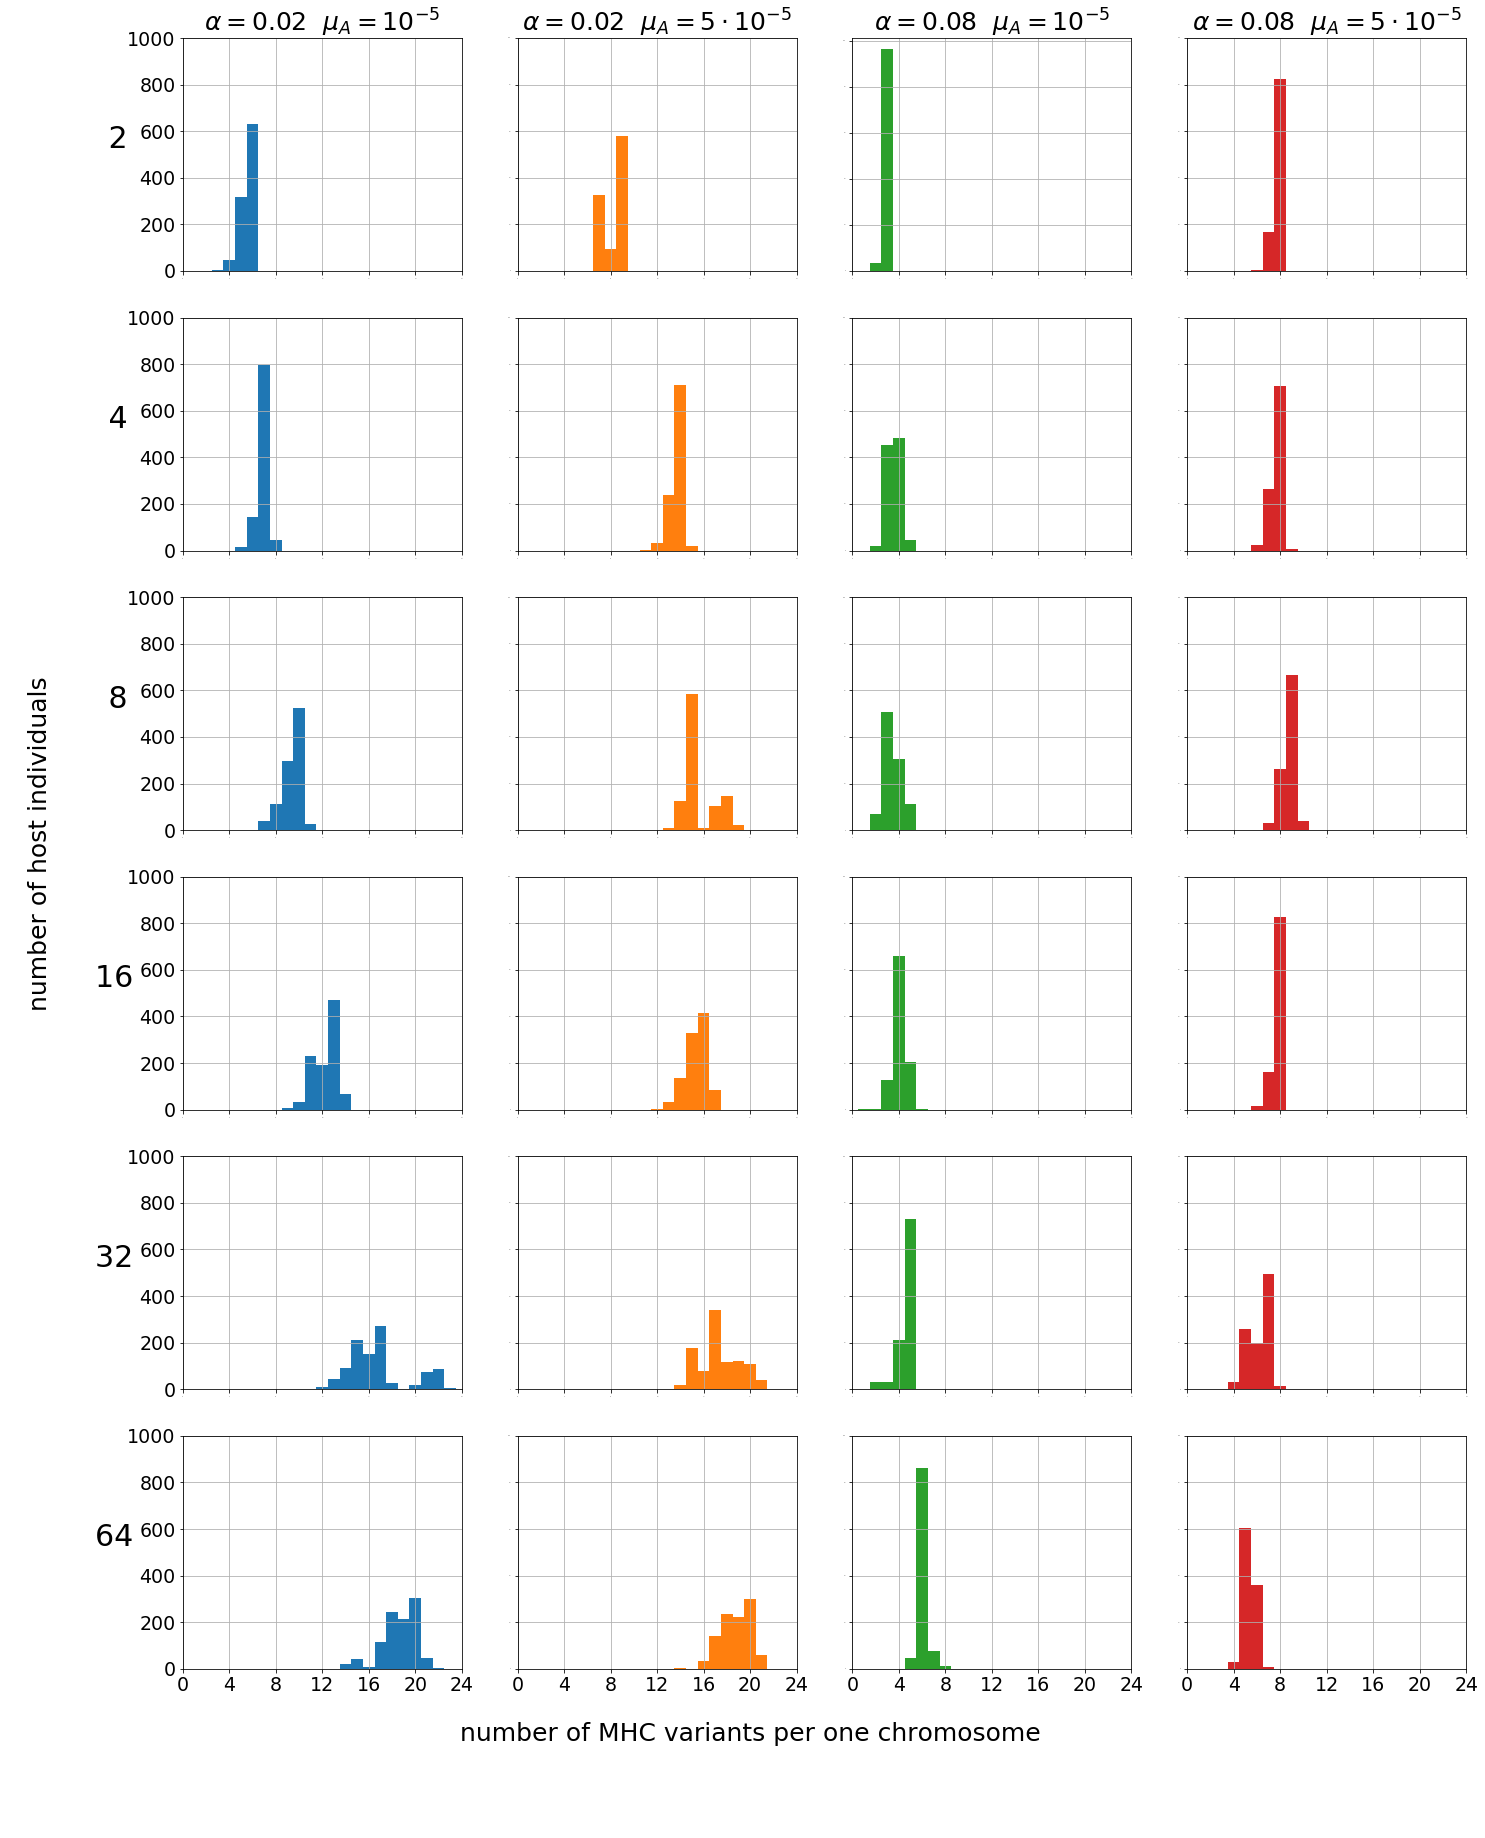

In [15]:
panelLayout = (0, 6, 12, 18, 1, 7, 13, 19, 2, 8, 14, 20, 3, 
               9, 15, 21, 4, 10, 16, 22, 5, 11, 17, 23)
clrLayout = 6 * ["C0", "C1", "C2", "C3"]
paramz = 6 * [r"$\alpha=0.02$  $\mu_{A}=10^{-5}$", r"$\alpha=0.02$  $\mu_{A}=5\cdot10^{-5}$",
              r"$\alpha=0.08$  $\mu_{A}=10^{-5}$", r"$\alpha=0.08$  $\mu_{A}=5\cdot10^{-5}$"]
sppLbl = (" 2  ", " 4  ", " 8  ", "16  ", "32  ", "64  ")
plt.figure(2, figsize=(23,30))
k = 0
for i, pp in enumerate(panelLayout):
    plt.subplot(6, 4, i+1)
    if(i == 20):
        plotOnePlot(lll[pp][4], 23, clrLayout[i], 1, 4, 'yes', 'yes', sppLbl[-1])
    elif(i in (21, 22, 23)):
        plotOnePlot(lll[pp][4], 23, clrLayout[i], 1, 4, 'yes', 'noYticks')
    elif(i in (0, 4, 8, 12, 16)):
        plotOnePlot(lll[pp][4], 23, clrLayout[i], 1, 4, 'noXticks', 'yes', sppLbl[k])
        k += 1
    else:
        plotOnePlot(lll[pp][4], 23, clrLayout[i], 1, 4, 'noXticks', 'noYticks')   
    if(i < 4):
        plt.title(paramz[i], fontsize=25)
    #plt.title(paramz[i] + " / " + str(lll[pp][1]), fontsize=20)
plt.annotate('number of MHC variants per one chromosome', xy=(.31, .05), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom', fontsize=25)
plt.annotate('number of host individuals', xy=(.019, .45), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom', rotation=90, fontsize=25)
plt.savefig("fig_S4.png", bbox_inches='tight')
plt.savefig("fig_S4.pdf", bbox_inches='tight')
plt.show()

In [ ]:
print(len(panelLayout), len(clrLayout))